## TF tunner samples

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt
from tensorflow.keras.callbacks import ReduceLROnPlateau
from processing import load_csv_data, slice_labels

In [2]:
from processing import load_image_dataset

x_rgb_train, y_rgb_train = load_image_dataset('Datasets/espe/lbp_histograms - copia/train', (40, 40), True)
x_rgb_test, y_rgb_test = load_image_dataset('Datasets/espe/lbp_histograms - copia/test', (40, 40), True)
x_rgb_validation, y_rgb_validation = load_image_dataset('Datasets/espe/lbp_histograms - copia/validation', (40, 40), True)

Using TensorFlow backend.


In [3]:
from processing import load_csv_data, slice_labels

train_path = 'Datasets/espe/lbp_histograms - copia/train'
train_data = load_csv_data(train_path)

test_path = 'Datasets/espe/lbp_histograms - copia/test'
test_data = load_csv_data(test_path)

validation_path = 'Datasets/espe/lbp_histograms - copia/validation'
validation_data = load_csv_data(validation_path)

# train_data.shape, test_data.shape, validation_data.shape
x_train, y_train = slice_labels(train_data)
x_test, y_test = slice_labels(test_data)
x_val, y_val = slice_labels(validation_data)

In [6]:
import pandas as pd
test_silhouette_dataset = pd.read_csv('Datasets/espe/lbp_histograms - copia/test/test.csv', header=None)[1:]
train_silhouette_dataset = pd.read_csv('Datasets/espe/lbp_histograms - copia/train/train.csv', header=None)[1:]
val_silhouette_dataset = pd.read_csv('Datasets/espe/lbp_histograms - copia/validation/validation.csv', header=None)[1:]

x_slhtt_test, y_slhtt_test = slice_labels(test_silhouette_dataset)
x_slhtt_train, y_slhtt_train = slice_labels(train_silhouette_dataset)
x_slhtt_val, y_slhtt_val = slice_labels(val_silhouette_dataset)

In [46]:
x_rgb_train.shape, x_train.shape

((9247, 40, 40, 1), (9247, 26))

In [47]:
x_rgb_validation.shape, x_val.shape

((2067, 40, 40, 1), (2067, 26))

In [48]:
from utils.Models import multi_input_model, lbp_histogram, lbp_image_classification
import datetime
loss_function = tf.keras.losses.CategoricalCrossentropy()

optimization_function = tf.keras.optimizers.RMSprop(lr=1e-3)
model = lbp_image_classification((40, 40, 1))

model.compile(loss='categorical_crossentropy', optimizer=optimization_function, metrics=['acc'])

In [49]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=8)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.1, patience=4, verbose=1, min_delta=1e-2)
callbacks_list = [stop_early, reduce_lr]

In [50]:
history = model.fit(x=[x_rgb_train], y=y_train, batch_size=200, epochs=30, validation_data=[[x_rgb_validation], y_val], callbacks=callbacks_list)

Train on 9247 samples, validate on 2067 samples
Epoch 1/30
9247/9247 [==============================] - 21s 2ms/sample - loss: 14.2525 - acc: 0.1570 - val_loss: 2.0387 - val_acc: 0.1771
Epoch 2/30
9247/9247 [==============================] - 2s 264us/sample - loss: 2.0187 - acc: 0.2495 - val_loss: 2.3863 - val_acc: 0.1727
Epoch 3/30
9247/9247 [==============================] - 2s 252us/sample - loss: 1.6564 - acc: 0.3785 - val_loss: 1.7681 - val_acc: 0.3116
Epoch 4/30
9247/9247 [==============================] - 2s 257us/sample - loss: 1.2828 - acc: 0.5295 - val_loss: 2.6230 - val_acc: 0.2429
Epoch 5/30
9247/9247 [==============================] - 2s 250us/sample - loss: 1.1643 - acc: 0.6091 - val_loss: 3.1440 - val_acc: 0.2516
Epoch 6/30
9247/9247 [==============================] - 2s 220us/sample - loss: 0.8728 - acc: 0.6946 - val_loss: 2.1018 - val_acc: 0.3570
Epoch 7/30
9247/9247 [==============================] - 2s 257us/sample - loss: 0.6434 - acc: 0.7763 - val_loss: 1.6199 - va

In [51]:
import matplotlib.pyplot as plt

In [52]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc', 'lr'])


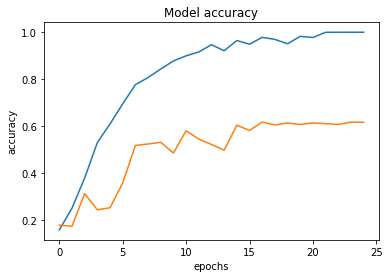

In [53]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.savefig('acc_1.png')

## Testing inference

In [54]:
model.evaluate(x=x_rgb_test, y=y_rgb_test, verbose=1)

1967/1967 [==============================] - 0s 214us/sample - loss: 2.6367 - acc: 0.6151


[2.636732850808993, 0.61515]

## Saving model

In [41]:
import os
checkpoint_path = "models/own/saved_model/my_model.h5"
model.save(checkpoint_path)

# Multi input model (lbp images, lbp histograms)

In [1]:
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt
from tensorflow.keras.callbacks import ReduceLROnPlateau
from processing import load_csv_data, slice_labels

Using TensorFlow backend.


In [2]:
from processing import load_image_dataset

x_rgb_train, y_rgb_train = load_image_dataset('Datasets/espe/lbp_histograms - copia/train', (40, 40), True)
x_rgb_test, y_rgb_test = load_image_dataset('Datasets/espe/lbp_histograms - copia/test', (40, 40), True)
x_rgb_validation, y_rgb_validation = load_image_dataset('Datasets/espe/lbp_histograms - copia/validation', (40, 40), True)

In [3]:
import pandas as pd
test_silhouette_dataset = pd.read_csv('Datasets/espe/lbp_histograms - copia/test/test.csv', header=None)[1:]
train_silhouette_dataset = pd.read_csv('Datasets/espe/lbp_histograms - copia/train/train.csv', header=None)[1:]
val_silhouette_dataset = pd.read_csv('Datasets/espe/lbp_histograms - copia/validation/validation.csv', header=None)[1:]

x_slhtt_test, y_slhtt_test = slice_labels(test_silhouette_dataset)
x_slhtt_train, y_slhtt_train = slice_labels(train_silhouette_dataset)
x_slhtt_val, y_slhtt_val = slice_labels(val_silhouette_dataset)

In [4]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=8)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.1, patience=4, verbose=1, min_delta=1e-2)
callbacks_list = [stop_early, reduce_lr]

In [5]:
from utils.Models import multi_input_model
mi_model = multi_input_model()
mi_history = mi_model.fit(x=[x_slhtt_train, x_rgb_train], y=y_rgb_train, validation_data=[[x_slhtt_val, x_rgb_validation], y_rgb_validation], batch_size=100, epochs=60, callbacks=callbacks_list)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 9247 samples, validate on 2067 samples
Epoch 1/60
9247/9247 [==============================] - 2s 258us/sample - loss: 1077.3051 - acc: 0.1418 - val_loss: 33.7445 - val_acc: 0.1229
Epoch 2/60
9247/9247 [==============================] - 2s 187us/sample - loss: 104.6669 - acc: 0.1498 - val_loss: 2.1829 - val_acc: 0.1263
Epoch 3/60
9247/9247 [==============================] - 2s 269us/sample - loss: 7.9073 - acc: 0.1393 - val_loss: 1.9461 - val_acc: 0.1263
Epoch 4/60
9247/9247 [==============================] - 5s 508us/sample - loss: 4.2562 - acc: 0.1440 - val_loss: 1.9461 - val_acc: 0.1263
Epoch 5/60
9100/9247 [============================>.] - ETA: 0s - loss: 2.9558 - acc: 0.1437
Epoch 00005: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-06.
9247/9247 [==============================] - 5s 513us/sample - loss: 2.9494 - acc: 0.1434 - val_loss: 1.9461 - val_acc: 0.1263
Epoch 6/60
92

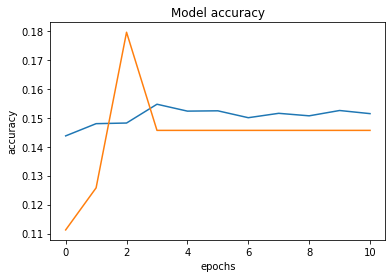

In [7]:
import matplotlib.pyplot as plt
plt.plot(mi_history.history['acc'])
plt.plot(mi_history.history['val_acc'])
plt.title('Model accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

### Silhouette identification

In [1]:
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt
from tensorflow.keras.callbacks import ReduceLROnPlateau
from processing import load_csv_data, slice_labels

Using TensorFlow backend.


In [2]:
import pandas as pd
from processing import slice_labels
test_silhouette_dataset = pd.read_csv('Datasets/espe/lbp_histograms - copia/test/test.csv', header=None)[1:]
train_silhouette_dataset = pd.read_csv('Datasets/espe/lbp_histograms - copia/train/train.csv', header=None)[1:]
val_silhouette_dataset = pd.read_csv('Datasets/espe/lbp_histograms - copia/validation/validation.csv', header=None)[1:]

x_slhtt_test, y_slhtt_test = slice_labels(test_silhouette_dataset)
x_slhtt_train, y_slhtt_train = slice_labels(train_silhouette_dataset)
x_slhtt_val, y_slhtt_val = slice_labels(val_silhouette_dataset)

In [3]:
from utils.Models import silhouette_classifier_model
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=8)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.1, patience=4, verbose=1, min_delta=1e-2)
callbacks_list = [stop_early, reduce_lr]
model = silhouette_classifier_model()
history = model.fit(x=[x_slhtt_train], y=y_slhtt_train, validation_data=[[x_slhtt_val], y_slhtt_val], batch_size=200, epochs=70, callbacks=callbacks_list)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 9247 samples, validate on 2067 samples
Epoch 1/70
9247/9247 [==============================] - 1s 59us/sample - loss: 850.9733 - acc: 0.1432 - val_loss: 245.7383 - val_acc: 0.1456
Epoch 2/70
9247/9247 [==============================] - 0s 22us/sample - loss: 306.3063 - acc: 0.1411 - val_loss: 199.7325 - val_acc: 0.1456
Epoch 3/70
9247/9247 [==============================] - 0s 23us/sample - loss: 235.4966 - acc: 0.1362 - val_loss: 121.8422 - val_acc: 0.1456
Epoch 4/70
9247/9247 [==============================] - 0s 29us/sample - loss: 191.8445 - acc: 0.1412 - val_loss: 135.6841 - val_acc: 0.1263
Epoch 5/70
8600/9247 [==========================>...] - ETA: 0s - loss: 163.5531 - acc: 0.1381
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
9247/9247 [==

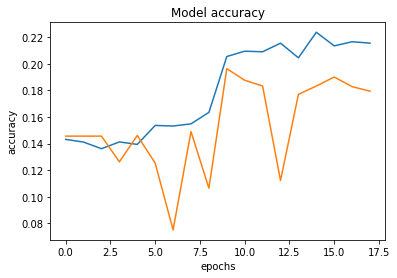

In [4]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [5]:
model.evaluate(x=x_slhtt_test, y=y_slhtt_test, verbose=1)

1967/1967 [==============================] - 0s 77us/sample - loss: 2.5996 - acc: 0.2857


[2.5996240609541847, 0.2857143]

In [40]:
val = x_slhtt_test.iloc[1200:1202]
val

,0,1
1201,52135.0,1666.9747388362885
1202,49878.0,1649.175748705864


In [39]:
y_slhtt_test[1200:1202]

array([[0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [3]:
import tensorflow as tf
from utils.IdentificationModel import IDPath

model = tf.keras.models.load_model('models/own/saved_model/my_model.h5')
image = x_rgb_test[0].reshape(1, 40, 40, 1)
# prediction = model.predict(x=image)
model = IDPath()
model.identify(image)

0    Luis
Name: 0, dtype: object